In [ ]:
import gseapy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
doe = pd.read_csv(f'./Training/Predictions/doe_all_holdout_predictions.csv')
doe['pred_neg-pos'] = doe['pred_neg'] - doe['pred_pos']
doe['pred_pos-neg'] = doe['pred_pos'] - doe['pred_neg']

res = pd.DataFrame()
for dir in ['neg','pos','other','neg-pos','pos-neg']:
    temp = doe[['ID','pred_'+dir]].set_axis([0,1],axis=1)
    temp = temp.set_axis(labels=temp[0]).drop(0,axis=1).squeeze()
    ss = gseapy.ssgsea(data=temp, gene_sets='/sc/arion/projects/GENECAD/Robert/GSEA/h.all.v2024.1.Hs.symbols.gmt', no_plot=True)
    ss = ss.res2d.reset_index().sort_values('NES',ascending=False)
    ss = ss[['Term','ES','NES']]
    ss['Direction'] = dir
    res = pd.concat([res,ss])
res = pd.pivot_table(res, index='Term', columns='Direction', values='NES').reset_index()
res['np_diff'] = res['neg'] - res['pos']
res = res.sort_values('np_diff', ascending=False)
res.to_pickle('./ssGSEA/hallmark_doe.pkl')


In [45]:
df = pd.read_pickle('./ssGSEA/hallmark_doe.pkl')
df['np_diff_abs'] = df['np_diff'].abs()
df['Term'] = df['Term'].str.split('HALLMARK_').str[1]
df.to_excel('./Supplemental tables/ssgsea.xlsx', index=False)
df.head()


Direction,Term,neg,neg-pos,other,pos,pos-neg,np_diff,np_diff_abs
29,MYC_TARGETS_V1,0.351613,0.71275,0.423003,-0.469111,-0.375811,0.820724,0.820724
27,MITOTIC_SPINDLE,0.564951,0.705217,-0.099009,-0.199805,-0.426322,0.764756,0.764756
11,E2F_TARGETS,0.481218,0.6894,0.007609,-0.27591,-0.462461,0.757128,0.757128
16,G2M_CHECKPOINT,0.473176,0.601911,-0.083608,-0.197925,-0.326564,0.671102,0.671102
34,PI3K_AKT_MTOR_SIGNALING,0.628368,0.539888,-0.255101,0.086934,-0.249843,0.541434,0.541434


Text(0.5, 0, 'Normalized enrichment score for inhibitor predictions')

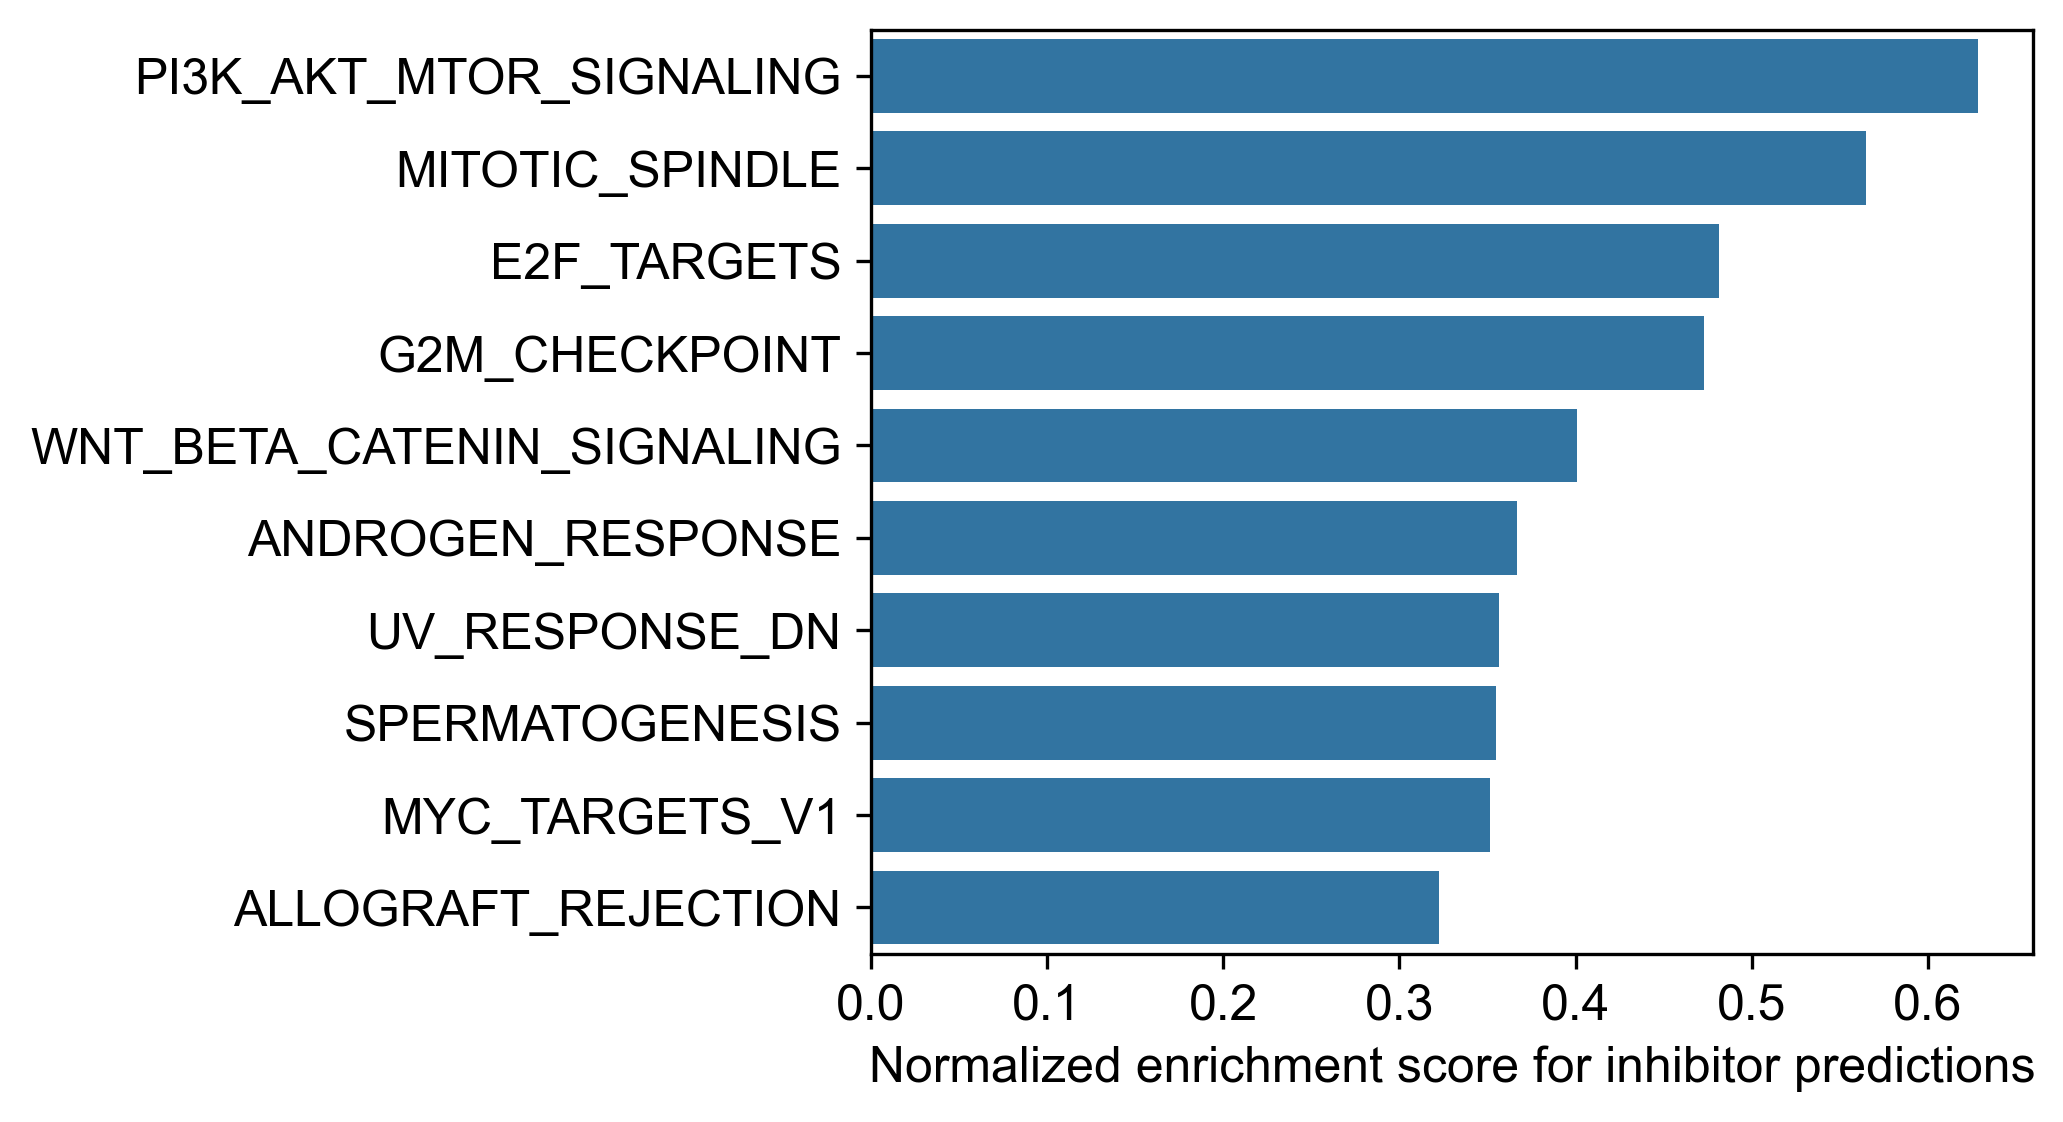

In [8]:
pdf = df.sort_values('neg', ascending=False).head(10)
plt.figure(figsize=(5,4), dpi=300)
sns.barplot(pdf, x='neg', y='Term')
plt.ylabel('')
plt.xlabel('Normalized enrichment score for inhibitor predictions')

Text(0.5, 0, 'Normalized enrichment score for activator predictions')

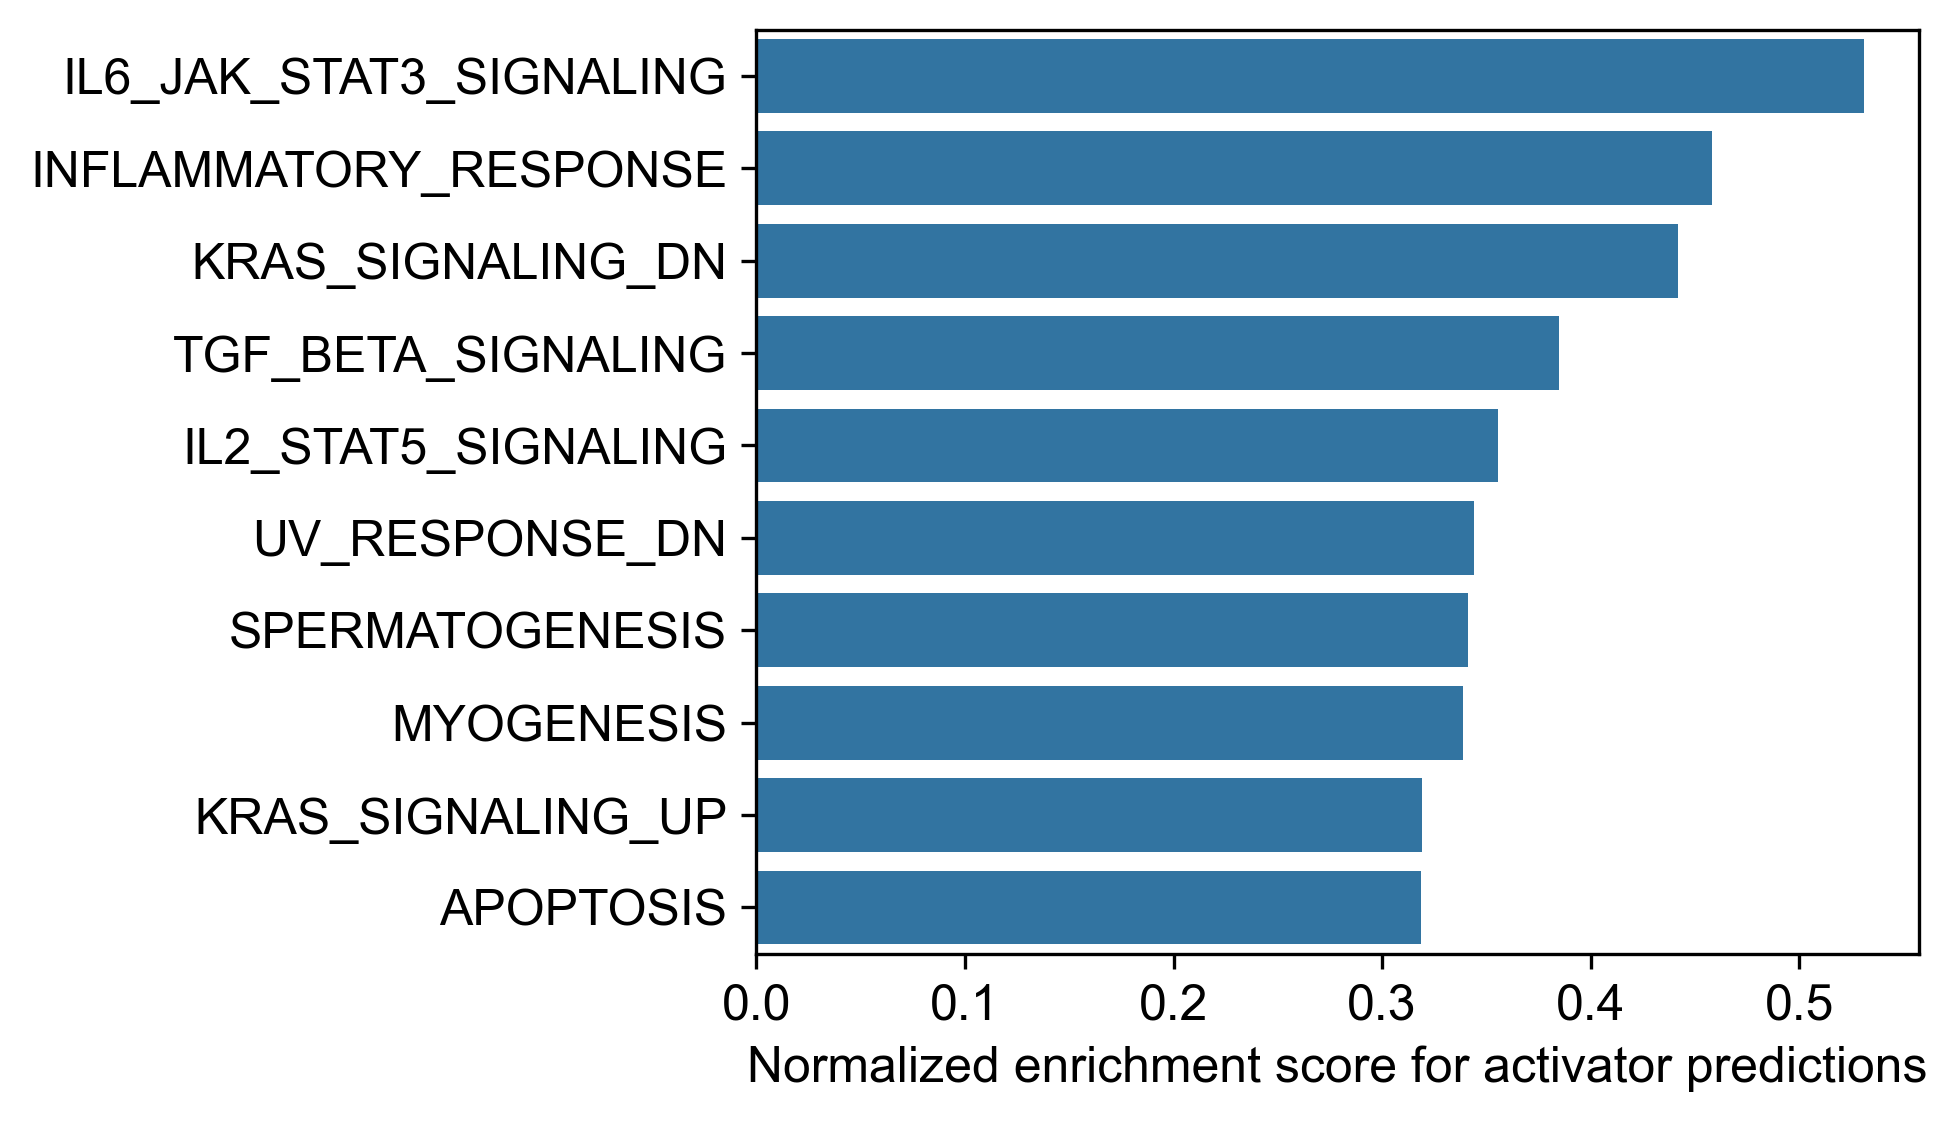

In [9]:
pdf = df.sort_values('pos', ascending=False).head(10)
plt.figure(figsize=(5,4), dpi=300)
sns.barplot(pdf, x='pos', y='Term')
plt.ylabel('')
plt.xlabel('Normalized enrichment score for activator predictions')

Text(0.5, 0, 'Normalized enrichment score for other predictions')

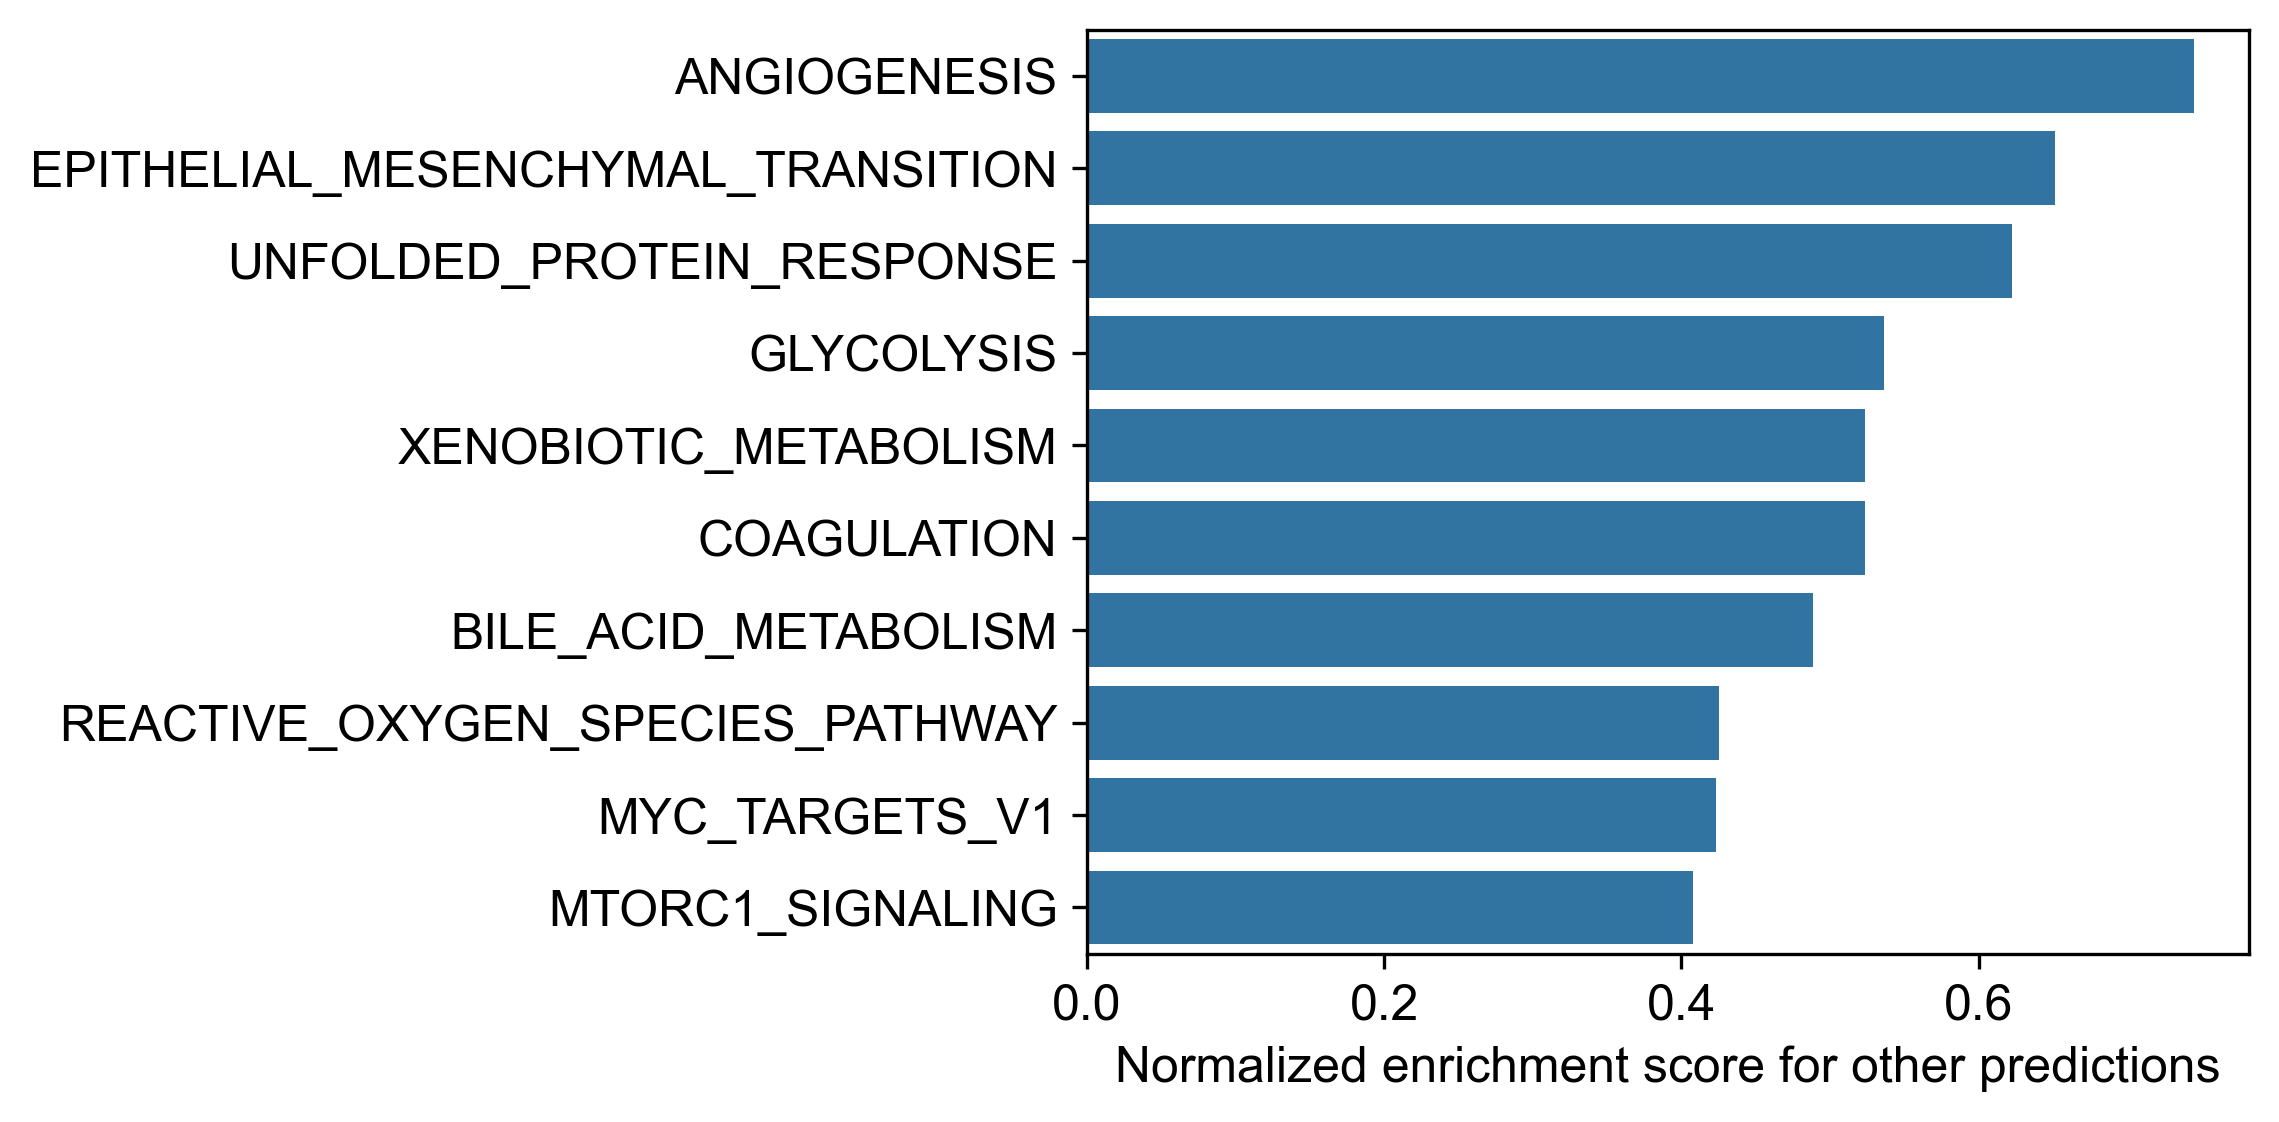

In [48]:
pdf = df.sort_values('other', ascending=False).head(10)
plt.figure(figsize=(5,4), dpi=300)
sns.barplot(pdf, x='other', y='Term')
plt.ylabel('')
plt.xlabel('Normalized enrichment score for other predictions')

Text(0.5, 0, 'Normalized enrichment score for inhibitor-activator predictions')

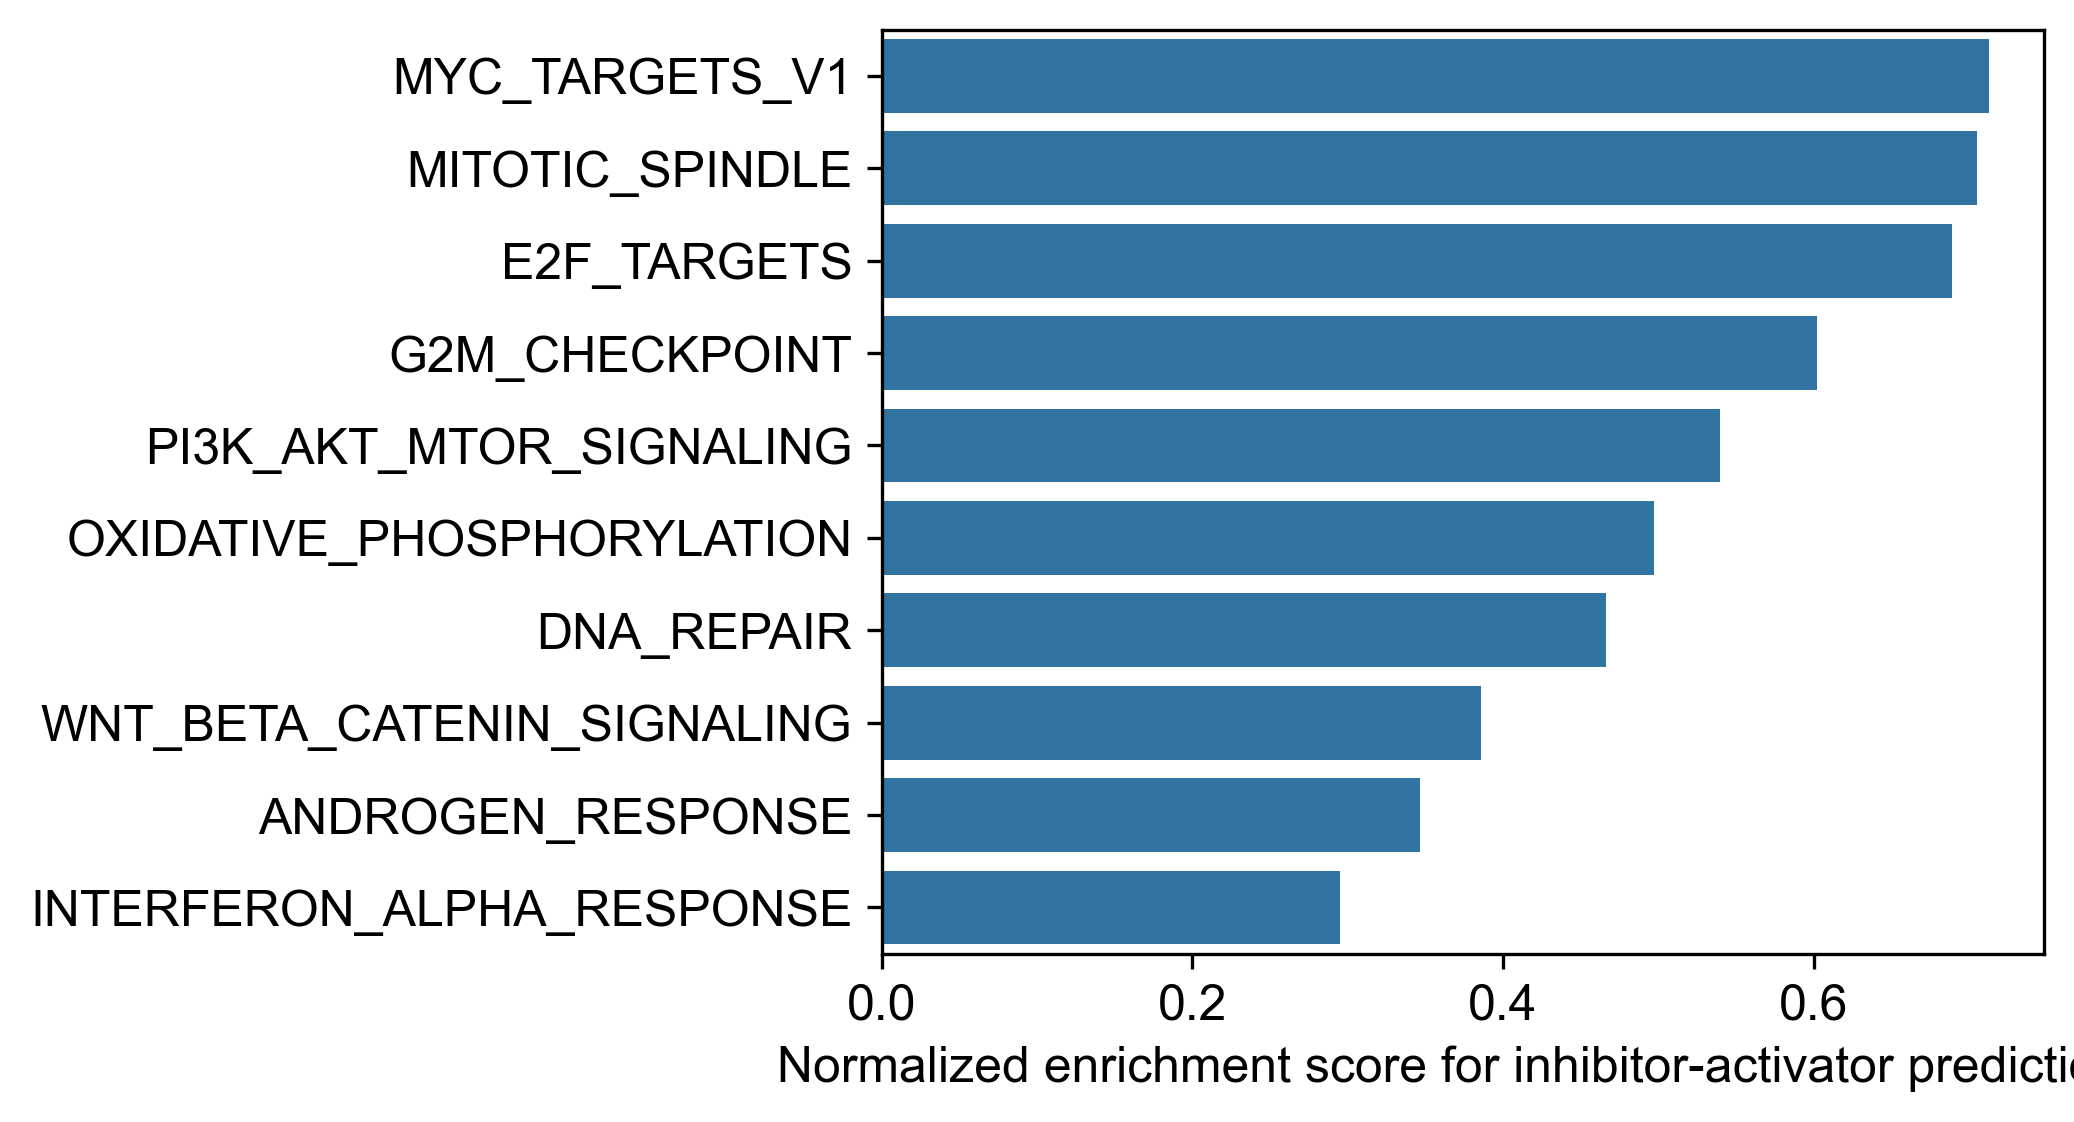

In [27]:
pdf = df.sort_values('neg-pos', ascending=False).head(10)
plt.figure(figsize=(5,4), dpi=300)
sns.barplot(pdf, x='neg-pos', y='Term')
plt.ylabel('')
plt.xlabel('Normalized enrichment score for inhibitor-activator predictions')


Text(0.5, 0, 'Normalized enrichment score for activator-inhibitor predictions')

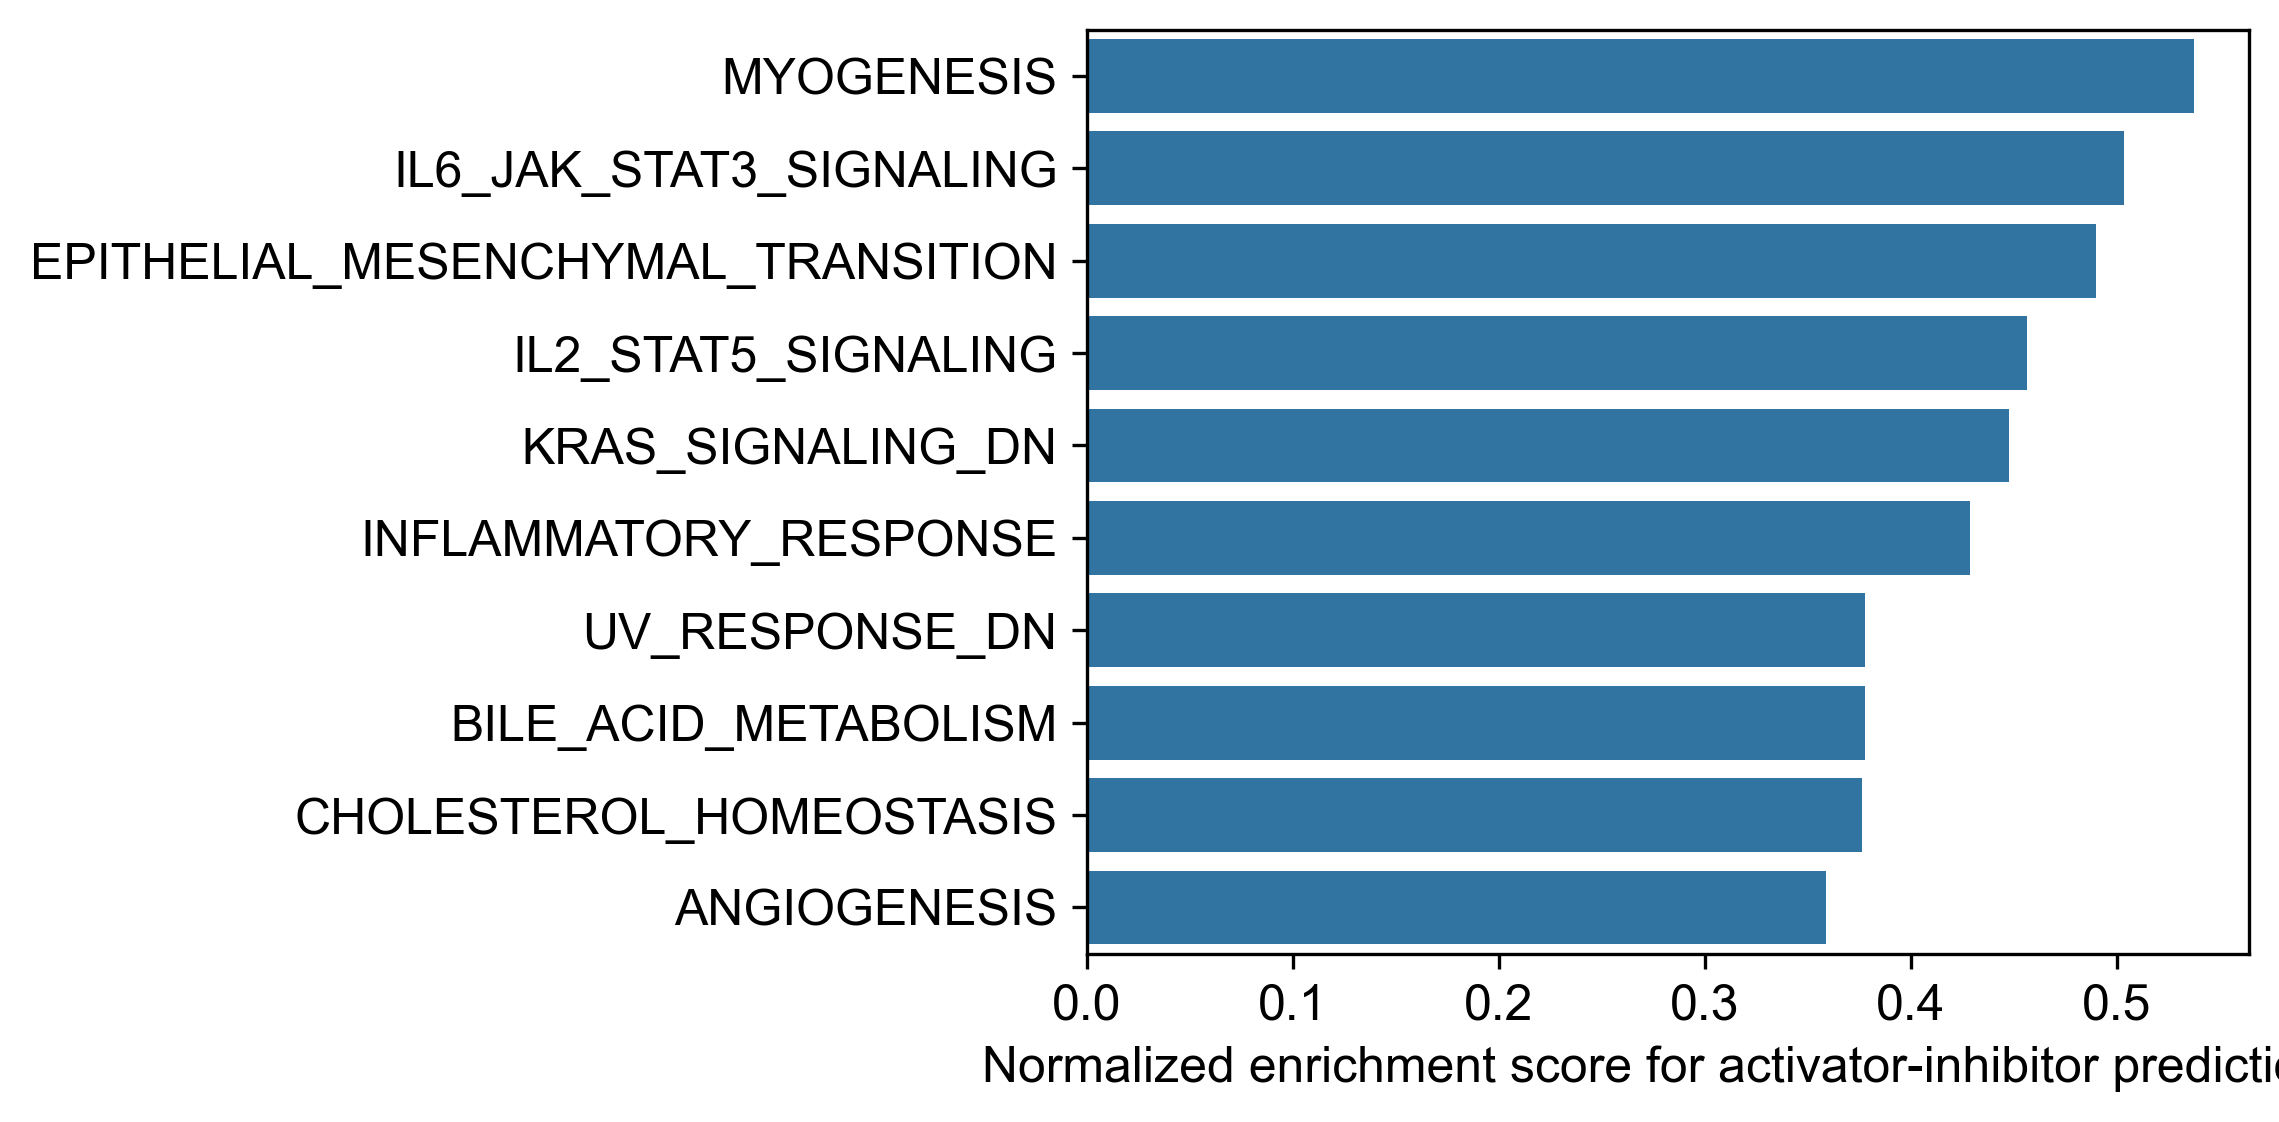

In [46]:
pdf = df.sort_values('pos-neg', ascending=False).head(10)
plt.figure(figsize=(5,4), dpi=300)
sns.barplot(pdf, x='pos-neg', y='Term')
plt.ylabel('')
plt.xlabel('Normalized enrichment score for activator-inhibitor predictions')
